C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


86/86 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.0235 - loss: 4.9426 - val_accuracy: 0.0132 - val_loss: 4.3067 - learning_rate: 0.0010
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.0640 - loss: 4.2279 - val_accuracy: 0.0161 - val_loss: 4.7045 - learning_rate: 0.0010
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.1092 - loss: 3.7611 - val_accuracy: 0.0088 - val_loss: 4.7842 - learning_rate: 0.0010
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.1566 - loss: 3.3334 - val_accuracy: 0.0352 - val_loss: 4.2921 - learning_rate: 0.0010
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - accuracy: 0.2165 - loss: 2.9560 - val_accuracy: 0.1056 - val_loss: 3.4858 - learning_rate: 0.0010
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.2976 - loss: 2.6829 - val_accuracy: 0.2933 - val_loss: 2.6908 - learning_rate: 0.0010
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.3550 - loss: 2.4142 - val_accuracy: 0.4

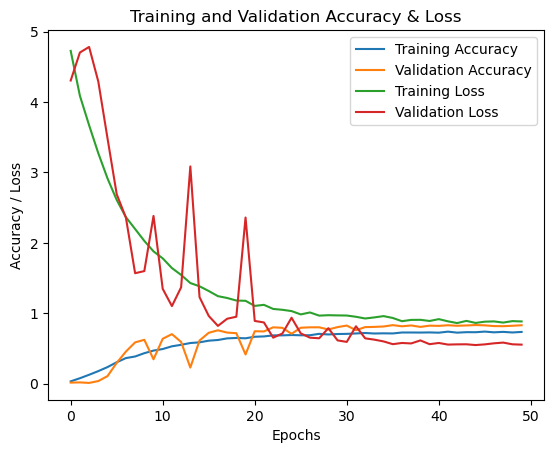

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

labels_df = pd.read_csv('english.csv')

image_folder = r'Img'
image_size = (32, 32)

images = []
labels = []

for index, row in labels_df.iterrows():
    image_name = row['image'].replace('Img/', '')
    label = row['label']

    image_path = os.path.join(image_folder, image_name)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, image_size)

    image = image / 255.0

    images.append(image)
    labels.append(label)

X = np.array(images).reshape(-1, 32, 32, 1)
y = np.array(labels)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False
)
datagen.fit(X_train)

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks=[lr_scheduler])

model.fit(datagen.flow(X_train, y_train, batch_size=32),
          epochs=50,
          validation_data=(X_test, y_test),
          callbacks=[lr_scheduler])

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Accuracy & Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()


Certainly! Here's a simplified breakdown of the steps for the given code, which trains a character recognition model using TensorFlow and Keras:

### 1. **Import Librari**
   - Load necessary libraries for data handling, image processing, model building, and training.

### 2. **Load and Preprocessata**
   - **Read CS**File**: Load image filenames and labels from a CSV file.
   - **Process Images**:
     - Read images from the specified folder.
     - Convert them to grayscale.
     - Resize images to 32x32 pixels.
     - Normalize pixel values to the range [0, 1].
   - **Prepare Arrays**:
     - Store images in an array with shape (32, 32, 1) for grayscale.
     - Encode labels into numerical values using `LabelEncoder`.

###. **Split Data**
   - **Train-Test Split**: Divide the dataset into training (80%) and testing (20%) sets.

### 4. Data Augmentation**
   - **Set Up Augmentation**: Use `ImageDataGenerator` to apply transformations like rotation, shifting, and zooming to the training images to improve generalization.

###. **Define the Model**
   - **Build CNN Model**:
     - Add convolutional layers for feature extraction.
     - Use batch normalization to stabilize training.
     - Add max pooling and dropout layers to reduce overfitting.
     - Flatten the output and add dense layers for classification.
     - The final layer has a softmax activation for multi-class classification.
### 6. **Compile the Model**
   - **Set Up Training**:
     - Use Adam optimizer with a learning rate of 0.001.
     - Set loss function to `sparse_categorical_crossentropy`.
     - Track accuracy as the performanceetric.

### 7. **Train the Model**
   - **Fit Model**:
     - Train the model using the augmented training data.
     - Validate the model on the test data.
     - Use a learning rate scheduler to adjust the learning rate if validation losplateaus.

### 8. **Evaluate the Model**
   - **Test Performance**: Assess the model’s accuracy on the test data and print the rult.

### 9. **Visualize Training History**
   - **Plot Metrics**:
     - Display graphs for training and validation accuracy and loss over epochs to analyze model performance and learning progress.

### Summary
In essence, the code loads and processes image data, defines and trains a convolutional neural network (CNN) model with data augmentation, evaluates its performance, and visualizes the training results.

In [7]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

X_train_rgb = np.repeat(X_train, 3, axis=-1)
X_test_rgb = np.repeat(X_test, 3, axis=-1)

resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

x = Flatten()(resnet.output)
x = Dense(128, activation='relu')(x)
output = Dense(len(label_encoder.classes_), activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(datagen.flow(X_train_rgb, y_train, batch_size=32),
                    epochs=50,
                    validation_data=(X_test_rgb, y_test),
                    callbacks=[lr_scheduler])

test_loss, test_acc = model.evaluate(X_test_rgb, y_test)
print(f"Test accuracy: {test_acc:.2f}")


Epoch 1/50


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


86/86 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.0566 - loss: 4.2991 - val_accuracy: 0.0147 - val_loss: 56.4015 - learning_rate: 0.0010
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 79s 913ms/step - accuracy: 0.1677 - loss: 3.4337 - val_accuracy: 0.0161 - val_loss: 15.1662 - learning_rate: 0.0010
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.3128 - loss: 2.5587 - val_accuracy: 0.0264 - val_loss: 4.7127 - learning_rate: 0.0010
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 84s 966ms/step - accuracy: 0.3234 - loss: 2.5124 - val_accuracy: 0.0132 - val_loss: 6.7698 - learning_rate: 0.0010
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 80s 928ms/step - accuracy: 0.4491 - loss: 1.9268 - val_accuracy: 0.0249 - val_loss: 4.3468 - learning_rate: 0.0010
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.4999 - loss: 1.7066 - val_accuracy: 0.0264 - val_loss: 4.8093 - learning_rate: 0.0010
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.5244 - loss: 1.6142 - val_accuracy

Here's a simplified breakdown of the steps for the given code, which utilizes the pre-trained ResNet50 model for character recognition:

1. **Prepare Data for ResNet50**:
   - **Convert Grayscale to RGB**: Duplicate the grayscale image channels to create RGB images, which are compatible with the ResNet50 model.

2. **Load Pre-trained ResNet50**:
   - **Load Model**: Import the ResNet50 model pre-trained on ImageNet, but without the top classification layer. This model is used as a feature extractor.

3. **Add Custom Layers**:
   - **Flatten**: Flatten the output of the ResNet50 model to convert it into a 1D vector.
   - **Dense Layers**: Add fully connected (dense) layers to adapt the model to the specific classification task:
     - A dense layer with 128 units and ReLU activation.
     - A final dense layer with a number of units equal to the number of classes, using softmax activation for classification.

4. **Create the Model**:
   - **Model Definition**: Combine the ResNet50 base model with the new custom layers into a new model.

5. **Compile the Model**:
   - **Setup**: Compile the model with:
     - The Adam optimizer with a learning rate of 0.001.
     - The loss function as `sparse_categorical_crossentropy` for multi-class classification.
     - Accuracy as the metric to track.

6. **Train the Model**:
   - **Fit Model**: Train the model using the augmented RGB training data and validate it with the RGB test data.
   - **Epochs**: Train for 50 epochs and use a learning rate scheduler to adjust the learning rate as needed.

7. **Evaluate the Model**:
   - **Test Performance**: Assess the model’s accuracy on the RGB test data and print the result.

In summary, the code adapts a pre-trained ResNet50 model for a specific classification task by converting grayscale images to RGB, adding custom layers, and then training and evaluating the model.